In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,max_error

from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

import itertools
import statsmodels.api as sm



c:\Users\kagau\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("..\\Datasets\\finaldata.xlsx")

In [3]:
df.drop_duplicates(subset=['TimeStamp'])

,TimeStamp,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,SNSP,Hydro Run-of-River,Fossil hard coal,Fossil oil,Fossil peat,...,temp,rhum,msl,wdsp,wddir,ElectricityPrice,day,month,hour,weekday
0,2019-01-01 00:00:00,2444.54,3005.92,599.98,599.15,0.4215,128.9,0.0,35.3,170.1,...,8.8,80,1034.7,9,250,70.28,1,1,0,1
1,2019-01-01 01:00:00,2326.80,2865.43,628.30,626.40,0.4324,128.4,0.0,28.2,225.0,...,8.3,82,1034.7,9,250,65.18,1,1,1,1
2,2019-01-01 02:00:00,1993.39,2613.60,517.65,513.24,0.4485,123.4,0.0,35.5,224.6,...,8.4,82,1034.7,8,240,60.91,1,1,2,1
3,2019-01-01 03:00:00,1752.69,2470.13,492.99,489.53,0.4832,124.1,0.0,35.6,190.7,...,8.6,82,1035.2,8,250,65.16,1,1,3,1
4,2019-01-01 04:00:00,1717.17,2384.35,424.52,378.44,0.4460,124.4,0.0,36.0,197.1,...,8.4,85,1035.5,10,250,65.16,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30615,2022-06-29 19:00:00,3978.34,3879.64,377.75,367.16,0.0931,116.3,456.0,146.4,96.5,...,15.8,73,1008.3,6,80,330.00,29,6,19,2
30616,2022-06-29 20:00:00,3843.57,3725.62,320.79,311.32,0.0751,92.3,450.7,123.8,93.6,...,14.5,80,1008.5,5,100,289.00,29,6,20,2
30617,2022-06-29 21:00:00,3796.31,3601.76,299.52,290.98,0.0668,80.5,450.7,122.2,93.6,...,14.0,77,1008.8,3,250,228.59,29,6,21,2
30618,2022-06-29 22:00:00,3754.00,3467.82,318.77,309.83,0.0732,59.7,340.1,121.5,96.1,...,13.3,82,1008.9,6,270,228.59,29,6,22,2


In [4]:
data=df.copy()
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%Y-%m-%dT%H:%M:%SZ')
data = data.set_index('TimeStamp')
data = data.asfreq('H')
data = data.sort_index()
data.head(2)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,SNSP,Hydro Run-of-River,Fossil hard coal,Fossil oil,Fossil peat,Fossil gas,temp,rhum,msl,wdsp,wddir,ElectricityPrice,day,month,hour,weekday
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2444.54,3005.92,599.98,599.15,0.4215,128.9,0.0,35.3,170.1,979.2,8.8,80.0,1034.7,9.0,250.0,70.28,1.0,1.0,0.0,1.0
2019-01-01 01:00:00,2326.80,2865.43,628.30,626.40,0.4324,128.4,0.0,28.2,225.0,808.3,8.3,82.0,1034.7,9.0,250.0,65.18,1.0,1.0,1.0,1.0


In [11]:
data=data.fillna(method='ffill')
data['ElectricityPrice'] = data['ElectricityPrice'].fillna(0)
data['IE Demand'] = data['IE Demand'].fillna(0)

In [18]:
data=data.drop(data[data.index>pd.to_datetime('31-12-2021  23:00:00')].index)
data.shape

(26304, 20)

In [14]:
final_df.head(2)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,SNSP,Hydro Run-of-River,Fossil hard coal,Fossil oil,Fossil peat,Fossil gas,temp,rhum,msl,wdsp,wddir,ElectricityPrice,day,month,hour,weekday
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2444.54,3005.92,599.98,599.15,0.4215,128.9,0.0,35.3,170.1,979.2,8.8,80.0,1034.7,9.0,250.0,70.28,1.0,1.0,0.0,1.0
2019-01-01 01:00:00,2326.80,2865.43,628.30,626.40,0.4324,128.4,0.0,28.2,225.0,808.3,8.3,82.0,1034.7,9.0,250.0,65.18,1.0,1.0,1.0,1.0


In [19]:

min_date = data.index.min()
max_date = data.index.max()
print("Min:", min_date, "Max:", max_date)
train_percent = .80
time_between = max_date - min_date
train_cutoff = min_date + train_percent*time_between
train_cutoff

Min: 2019-01-01 00:00:00 Max: 2021-12-31 23:00:00


Timestamp('2021-05-26 18:24:00', freq='H')

In [20]:
train_days = 1095
train_cutoff = min_date + pd.DateOffset(train_days)

In [21]:
train_df = data[data.index <= train_cutoff]
test_df = data[data.index > train_cutoff]

print("Train:", train_df.index.min(), train_df.index.max(), len(train_df))
print("Test:", test_df.index.min(), test_df.index.max(), len(test_df))

Train: 2019-01-01 00:00:00 2021-12-31 00:00:00 26281
Test: 2021-12-31 01:00:00 2021-12-31 23:00:00 23


In [24]:
train_df=train_df.drop(columns=['ElectricityPrice'])
test_df=test_df.drop(columns=['ElectricityPrice'])

In [25]:
from pmdarima import auto_arima
model = auto_arima(
	train_df["IE Demand"],
	exogenous=train_df.loc[:, train_df.columns != 'IE Demand'],
	trace=True,
	error_action="ignore",
	suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=325917.610, Time=17.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=349897.745, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328842.301, Time=1.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=332399.779, Time=6.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=349895.745, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=325924.879, Time=8.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=325945.729, Time=2.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=325916.079, Time=14.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=325947.581, Time=5.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=29.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=319196.928, Time=26.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=320402.656, Time=25.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.02 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=319128.233, Time=29.75 sec
 ARIMA(2,1,4

In [31]:
# Save model
save_forecaster(model, file_name='demandArima.py', verbose=False)

In [28]:
exogenous_features = list(data)
exogenous_features.remove('IE Demand')
exogenous_features.remove('ElectricityPrice')
exogenous_features

['IE Generation',
 'IE Wind Availability',
 'IE Wind Generation',
 'SNSP',
 'Hydro Run-of-River',
 'Fossil hard coal',
 'Fossil oil',
 'Fossil peat',
 'Fossil gas',
 'temp',
 'rhum',
 'msl',
 'wdsp',
 'wddir',
 'day',
 'month',
 'hour',
 'weekday']

In [29]:
forecast = model.predict(n_periods=len(test_df),  exogenous=test_df[exogenous_features])

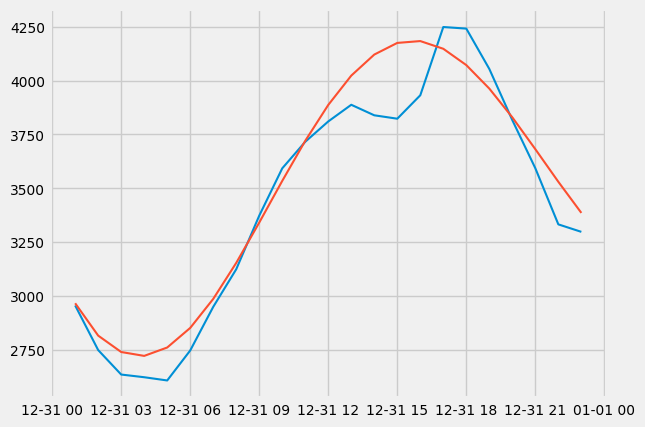

In [30]:
#forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])

#plot the predictions for validation set
#plt.plot(train, label='Train')
plt.plot(test_df['IE Demand'], label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [56]:
from prophet import Prophet
model2 = Prophet()

cmdstanpy  DEBUG cmd: where.exe tbb.dll
cwd: None
cmdstanpy  DEBUG TBB already found in load path


In [57]:
for feature in exogenous_features:
	model2.add_regressor(feature)

In [45]:
data2=df.copy()
data2['TimeStamp'] = pd.to_datetime(data2['TimeStamp'], format='%Y-%m-%dT%H:%M:%SZ')

#data2 = data2.asfreq('H')
data2=data2.fillna(method='ffill')

In [47]:

min_date = data2['TimeStamp'].min()
max_date = data2['TimeStamp'].max()
print("Min:", min_date, "Max:", max_date)


Min: 2019-01-01 00:00:00 Max: 2022-06-29 23:00:00


In [50]:
train_percent = .80
time_between = max_date - min_date
train_cutoff = min_date + train_percent*time_between
train_cutoff


Timestamp('2021-10-17 18:24:00')

In [51]:
train_days = 1095
train_cutoff = min_date + pd.DateOffset(train_days)

In [52]:
train_df2 = data2[data2['TimeStamp'] <= train_cutoff]
test_df2 = data2[data2['TimeStamp'] > train_cutoff]

print("Train:", train_df2.index.min(), train_df2.index.max(), len(train_df2))
print("Test:", test_df2.index.min(), test_df2.index.max(), len(test_df2))

Train: 0 26277 26278
Test: 26278 30619 4342


In [53]:
train_df2.head(2)

,TimeStamp,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,SNSP,Hydro Run-of-River,Fossil hard coal,Fossil oil,Fossil peat,...,temp,rhum,msl,wdsp,wddir,ElectricityPrice,day,month,hour,weekday
0,2019-01-01 00:00:00,2444.54,3005.92,599.98,599.15,0.4215,128.9,0.0,35.3,170.1,...,8.8,80,1034.7,9,250,70.28,1,1,0,1
1,2019-01-01 01:00:00,2326.80,2865.43,628.30,626.40,0.4324,128.4,0.0,28.2,225.0,...,8.3,82,1034.7,9,250,65.18,1,1,1,1


In [58]:
model2.fit(train_df2[["TimeStamp", "IE Demand"] + exogenous_features].rename(columns={"TimeStamp": "ds", "IE Demand": "y"}))

cmdstanpy  DEBUG input tempfile: C:\Users\kagau\AppData\Local\Temp\tmpxvm0hg6x\nr2ryv5m.json
cmdstanpy  DEBUG input tempfile: C:\Users\kagau\AppData\Local\Temp\tmpxvm0hg6x\hpi8crh9.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['C:\\Users\\kagau\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=9052', 'data', 'file=C:\\Users\\kagau\\AppData\\Local\\Temp\\tmpxvm0hg6x\\nr2ryv5m.json', 'init=C:\\Users\\kagau\\AppData\\Local\\Temp\\tmpxvm0hg6x\\hpi8crh9.json', 'output', 'file=C:\\Users\\kagau\\AppData\\Local\\Temp\\tmpxvm0hg6x\\prophet_modelxe049r1c\\prophet_model-20230619154200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:42:00 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
15:42:29 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [60]:
forecast2 = model2.predict(test_df2[["TimeStamp"] + exogenous_features].rename(columns={"TimeStamp": "ds"}))

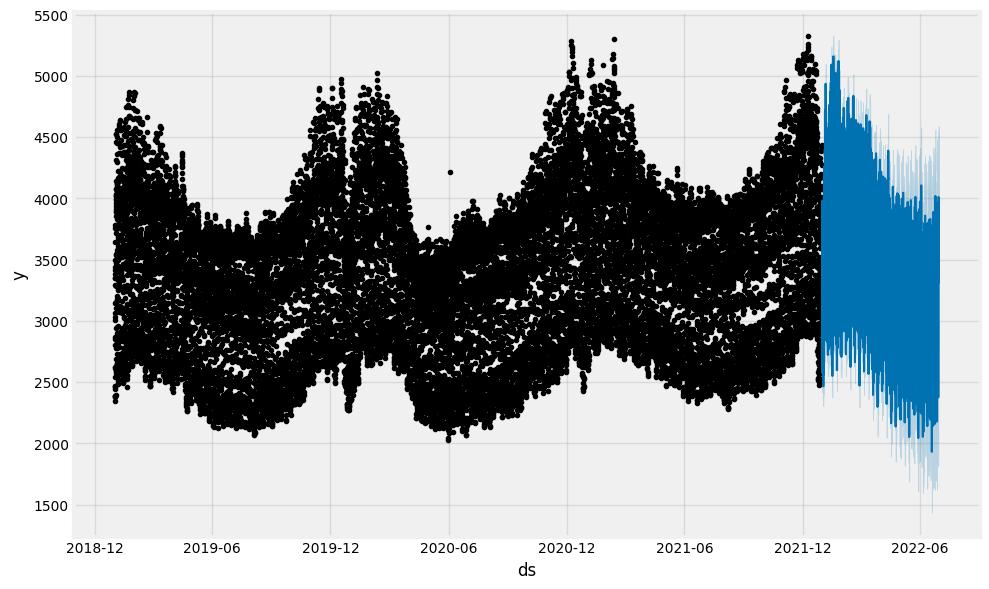

In [62]:
fig1 = model2.plot(forecast2)


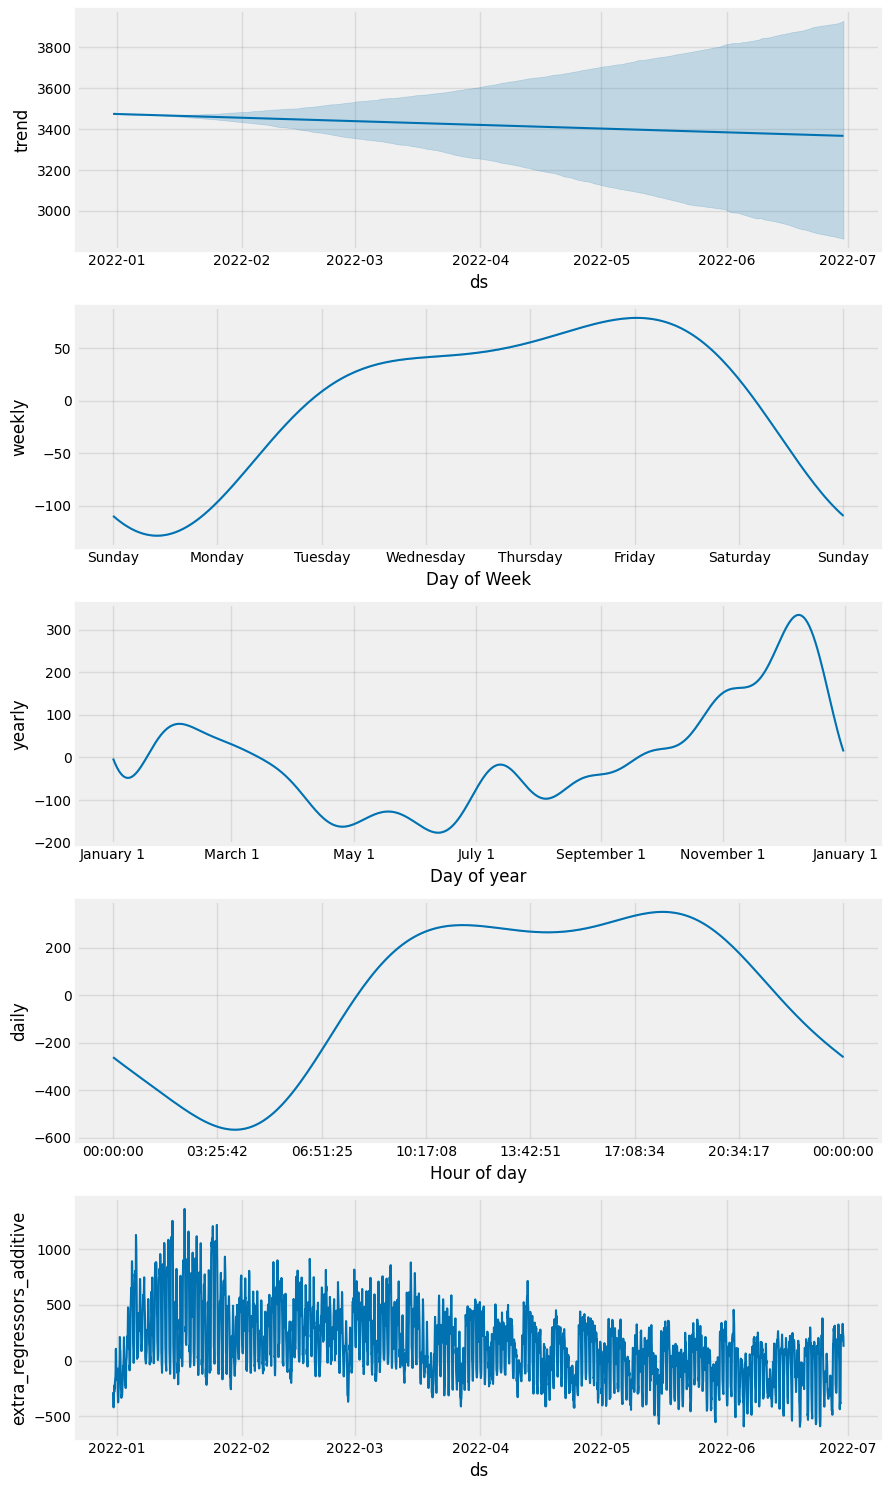

In [63]:
fig2 = model2.plot_components(forecast2)


In [64]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model2, forecast2)

In [67]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [68]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1))

	model.compile(loss=params["loss"],
              	optimizer=params["optimizer"],
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [78]:
train_df.loc[:, train_df.columns != 'IE Demand'].shape[1]

19

In [79]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 90,
	"epochs": 30,
	"batch_size": 128,
	"es_patience" : 10
}

model3 = get_model(params=params, input_shape=train_df.loc[:, train_df.columns != 'IE Demand'].shape[1])

In [70]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min',
patience=params["es_patience"])

In [80]:
model3.fit(
	train_df.loc[:, train_df.columns != 'IE Demand'],
	train_df['IE Demand'],
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1,
	callbacks=[es_callback]
)

Epoch 1/30
205/206 [============================>.] - ETA: 0s - loss: 11808487.0000 - root_mean_squared_error: 3436.3479 - mean_absolute_error: 3379.4990

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 22s 79ms/step - loss: 11809926.0000 - root_mean_squared_error: 3436.5574 - mean_absolute_error: 3379.6963
Epoch 2/30
205/206 [============================>.] - ETA: 0s - loss: 11675509.0000 - root_mean_squared_error: 3416.9443 - mean_absolute_error: 3359.7791

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 17s 84ms/step - loss: 11675204.0000 - root_mean_squared_error: 3416.8997 - mean_absolute_error: 3359.7068
Epoch 3/30
205/206 [============================>.] - ETA: 0s - loss: 11549080.0000 - root_mean_squared_error: 3398.3938 - mean_absolute_error: 3340.9084

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 17s 83ms/step - loss: 11549307.0000 - root_mean_squared_error: 3398.4272 - mean_absolute_error: 3340.9160
Epoch 4/30
205/206 [============================>.] - ETA: 0s - loss: 11424722.0000 - root_mean_squared_error: 3380.0476 - mean_absolute_error: 3322.1836

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 17s 84ms/step - loss: 11425526.0000 - root_mean_squared_error: 3380.1665 - mean_absolute_error: 3322.3235
Epoch 5/30
205/206 [============================>.] - ETA: 0s - loss: 11302045.0000 - root_mean_squared_error: 3361.8513 - mean_absolute_error: 3303.7117

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 17s 84ms/step - loss: 11303051.0000 - root_mean_squared_error: 3362.0010 - mean_absolute_error: 3303.8467
Epoch 6/30
205/206 [============================>.] - ETA: 0s - loss: 11181222.0000 - root_mean_squared_error: 3343.8335 - mean_absolute_error: 3285.3660

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 11182041.0000 - root_mean_squared_error: 3343.9558 - mean_absolute_error: 3285.4866
Epoch 7/30
205/206 [============================>.] - ETA: 0s - loss: 11062358.0000 - root_mean_squared_error: 3326.0122 - mean_absolute_error: 3267.2510

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 89ms/step - loss: 11061931.0000 - root_mean_squared_error: 3325.9482 - mean_absolute_error: 3267.1792
Epoch 8/30
205/206 [============================>.] - ETA: 0s - loss: 10944263.0000 - root_mean_squared_error: 3308.2114 - mean_absolute_error: 3249.1335

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 10943107.0000 - root_mean_squared_error: 3308.0366 - mean_absolute_error: 3248.9309
Epoch 9/30
205/206 [============================>.] - ETA: 0s - loss: 10824244.0000 - root_mean_squared_error: 3290.0220 - mean_absolute_error: 3230.5649

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 10824519.0000 - root_mean_squared_error: 3290.0637 - mean_absolute_error: 3230.6064
Epoch 10/30
205/206 [============================>.] - ETA: 0s - loss: 10707397.0000 - root_mean_squared_error: 3272.2158 - mean_absolute_error: 3212.4441

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 88ms/step - loss: 10706865.0000 - root_mean_squared_error: 3272.1345 - mean_absolute_error: 3212.3572
Epoch 11/30
205/206 [============================>.] - ETA: 0s - loss: 10588949.0000 - root_mean_squared_error: 3254.0667 - mean_absolute_error: 3194.0112

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 88ms/step - loss: 10589716.0000 - root_mean_squared_error: 3254.1843 - mean_absolute_error: 3194.0867
Epoch 12/30
205/206 [============================>.] - ETA: 0s - loss: 10473937.0000 - root_mean_squared_error: 3236.3462 - mean_absolute_error: 3175.8530

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 10474601.0000 - root_mean_squared_error: 3236.4487 - mean_absolute_error: 3175.9678
Epoch 13/30
205/206 [============================>.] - ETA: 0s - loss: 10357490.0000 - root_mean_squared_error: 3218.3054 - mean_absolute_error: 3157.5222

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 10359026.0000 - root_mean_squared_error: 3218.5442 - mean_absolute_error: 3157.7542
Epoch 14/30
205/206 [============================>.] - ETA: 0s - loss: 10246695.0000 - root_mean_squared_error: 3201.0459 - mean_absolute_error: 3139.8901

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 10246317.0000 - root_mean_squared_error: 3200.9868 - mean_absolute_error: 3139.8320
Epoch 15/30
205/206 [============================>.] - ETA: 0s - loss: 10132359.0000 - root_mean_squared_error: 3183.1367 - mean_absolute_error: 3121.6204

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 10131576.0000 - root_mean_squared_error: 3183.0137 - mean_absolute_error: 3121.5134
Epoch 16/30
205/206 [============================>.] - ETA: 0s - loss: 10021147.0000 - root_mean_squared_error: 3165.6196 - mean_absolute_error: 3103.8164

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 88ms/step - loss: 10019298.0000 - root_mean_squared_error: 3165.3274 - mean_absolute_error: 3103.4695
Epoch 17/30
205/206 [============================>.] - ETA: 0s - loss: 9907321.0000 - root_mean_squared_error: 3147.5896 - mean_absolute_error: 3085.3760

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 88ms/step - loss: 9908379.0000 - root_mean_squared_error: 3147.7578 - mean_absolute_error: 3085.5500
Epoch 18/30
205/206 [============================>.] - ETA: 0s - loss: 9796199.0000 - root_mean_squared_error: 3129.8879 - mean_absolute_error: 3067.3088

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 9795909.0000 - root_mean_squared_error: 3129.8418 - mean_absolute_error: 3067.2678
Epoch 19/30
205/206 [============================>.] - ETA: 0s - loss: 9687771.0000 - root_mean_squared_error: 3112.5186 - mean_absolute_error: 3049.5396

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 85ms/step - loss: 9685509.0000 - root_mean_squared_error: 3112.1550 - mean_absolute_error: 3049.1704
Epoch 20/30
205/206 [============================>.] - ETA: 0s - loss: 9574984.0000 - root_mean_squared_error: 3094.3472 - mean_absolute_error: 3031.0127

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 9575226.0000 - root_mean_squared_error: 3094.3862 - mean_absolute_error: 3031.0598
Epoch 21/30
205/206 [============================>.] - ETA: 0s - loss: 9466736.0000 - root_mean_squared_error: 3076.8062 - mean_absolute_error: 3013.0979

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 9467652.0000 - root_mean_squared_error: 3076.9551 - mean_absolute_error: 3013.2446
Epoch 22/30
205/206 [============================>.] - ETA: 0s - loss: 9358550.0000 - root_mean_squared_error: 3059.1748 - mean_absolute_error: 2995.1013

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 9358877.0000 - root_mean_squared_error: 3059.2283 - mean_absolute_error: 2995.1521
Epoch 23/30
205/206 [============================>.] - ETA: 0s - loss: 9251339.0000 - root_mean_squared_error: 3041.6013 - mean_absolute_error: 2977.1279

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 85ms/step - loss: 9251591.0000 - root_mean_squared_error: 3041.6428 - mean_absolute_error: 2977.2073
Epoch 24/30
205/206 [============================>.] - ETA: 0s - loss: 9146997.0000 - root_mean_squared_error: 3024.4004 - mean_absolute_error: 2959.5017

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 9146612.0000 - root_mean_squared_error: 3024.3367 - mean_absolute_error: 2959.4478
Epoch 25/30
205/206 [============================>.] - ETA: 0s - loss: 9036319.0000 - root_mean_squared_error: 3006.0471 - mean_absolute_error: 2940.7834

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 86ms/step - loss: 9036462.0000 - root_mean_squared_error: 3006.0708 - mean_absolute_error: 2940.7915
Epoch 26/30
205/206 [============================>.] - ETA: 0s - loss: 8933462.0000 - root_mean_squared_error: 2988.8896 - mean_absolute_error: 2923.2302

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 85ms/step - loss: 8934674.0000 - root_mean_squared_error: 2989.0925 - mean_absolute_error: 2923.4456
Epoch 27/30
205/206 [============================>.] - ETA: 0s - loss: 8828073.0000 - root_mean_squared_error: 2971.2073 - mean_absolute_error: 2905.1633

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 19s 91ms/step - loss: 8828593.0000 - root_mean_squared_error: 2971.2949 - mean_absolute_error: 2905.2371
Epoch 28/30
205/206 [============================>.] - ETA: 0s - loss: 8725657.0000 - root_mean_squared_error: 2953.9224 - mean_absolute_error: 2887.3945

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 87ms/step - loss: 8724902.0000 - root_mean_squared_error: 2953.7944 - mean_absolute_error: 2887.2676
Epoch 29/30
205/206 [============================>.] - ETA: 0s - loss: 8621152.0000 - root_mean_squared_error: 2936.1799 - mean_absolute_error: 2869.2822

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 18s 88ms/step - loss: 8620975.0000 - root_mean_squared_error: 2936.1497 - mean_absolute_error: 2869.2397
Epoch 30/30
205/206 [============================>.] - ETA: 0s - loss: 8518446.0000 - root_mean_squared_error: 2918.6377 - mean_absolute_error: 2851.3748

tensorflow WARNING Early stopping conditioned on metric `val_root_mean_squared_error` which is not available. Available metrics are: loss,root_mean_squared_error,mean_absolute_error


206/206 [==============================] - 19s 92ms/step - loss: 8517019.0000 - root_mean_squared_error: 2918.3933 - mean_absolute_error: 2851.0747


In [82]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 19, 90)            33120     
                                                                 
 dropout_12 (Dropout)        (None, 19, 90)            0         
                                                                 
 lstm_13 (LSTM)              (None, 19, 90)            65160     
                                                                 
 dropout_13 (Dropout)        (None, 19, 90)            0         
                                                                 
 lstm_14 (LSTM)              (None, 19, 90)            65160     
                                                                 
 dropout_14 (Dropout)        (None, 19, 90)            0         
                                                                 
 lstm_15 (LSTM)              (None, 90)               

In [83]:

save_forecaster(model3, file_name='lstmdemand.py', verbose=False)

In [84]:

save_forecaster(model2, file_name='demandphrophet.py', verbose=False)

In [ ]:
import neptune

# Create a Neptune run object
run = neptune.init_run(
    project="your-workspace-name/your-project-name",  
    api_token="YourNeptuneApiToken",  
)

In [ ]:
run["model/name"] = "Arima"